# **ATIVIDADE III - VISUALIZAÇÃO DE DADOS**

## Importando bibliotecas

In [ ]:
#Importação de bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [4]:
#Configurações visuais padrão dos gráficos
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.grid'] = True


## Importando dados

In [9]:
# Leitura do arquivo CSV
arquivo = "megalhaes.csv"
df = pd.read_csv(arquivo, sep=",", encoding="utf-8")

# Exibir informações básicas
print("Dimensão do dataset:", df.shape)
print("\nColunas disponíveis:")
print(df.columns.tolist())

# Visualizar as primeiras linhas do conjunto de dados
df.head()

Dimensão do dataset: (50, 14)

Colunas disponíveis:
['id', 'turma', 'sexo', 'idade', 'altura', 'peso', 'filhos', 'fuma', 'tolerancia', 'exercicio', 'cinema', 'opcinema', 'tv', 'optv']


,id,turma,sexo,idade,altura,peso,filhos,fuma,tolerancia,exercicio,cinema,opcinema,tv,optv
0,1,A,F,17,1.60,60.5,2,nao,P,0,1,B,16,R
1,2,A,F,18,1.69,55.0,1,nao,M,0,1,B,7,R
2,3,A,M,18,1.85,72.8,2,nao,P,5,2,M,15,R
3,4,A,M,25,1.85,80.9,2,nao,P,5,2,B,20,R
4,5,A,F,19,1.58,55.0,1,nao,M,2,2,B,5,R


### Inspeção

In [10]:
print("=== Informações gerais ===")
display(df.info())

print("\n=== Primeiras linhas ===")
display(df.head())

print("\n=== Estatísticas descritivas (variáveis numéricas) ===")
display(df.describe().T)

print("\n=== Valores ausentes por coluna ===")
display(df.isna().sum())

print("\n=== Distribuição das principais variáveis ===")
if 'Sexo' in df.columns:
    print("\nSexo:")
    display(df['Sexo'].value_counts(dropna=False))
if 'Toler' in df.columns:
    print("\nTolerância ao cigarro (Toler):")
    display(df['Toler'].value_counts(dropna=False))
if 'TV' in df.columns:
    print("\nExemplo de valores em TV:")
    display(df['TV'].head(10))

=== Informações gerais ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          50 non-null     int64  
 1   turma       50 non-null     object 
 2   sexo        50 non-null     object 
 3   idade       50 non-null     int64  
 4   altura      50 non-null     float64
 5   peso        50 non-null     float64
 6   filhos      50 non-null     int64  
 7   fuma        50 non-null     object 
 8   tolerancia  50 non-null     object 
 9   exercicio   50 non-null     int64  
 10  cinema      50 non-null     int64  
 11  opcinema    50 non-null     object 
 12  tv          50 non-null     int64  
 13  optv        50 non-null     object 
dtypes: float64(2), int64(6), object(6)
memory usage: 5.6+ KB


None


=== Primeiras linhas ===


,id,turma,sexo,idade,altura,peso,filhos,fuma,tolerancia,exercicio,cinema,opcinema,tv,optv
0,1,A,F,17,1.60,60.5,2,nao,P,0,1,B,16,R
1,2,A,F,18,1.69,55.0,1,nao,M,0,1,B,7,R
2,3,A,M,18,1.85,72.8,2,nao,P,5,2,M,15,R
3,4,A,M,25,1.85,80.9,2,nao,P,5,2,B,20,R
4,5,A,F,19,1.58,55.0,1,nao,M,2,2,B,5,R



=== Estatísticas descritivas (variáveis numéricas) ===


,count,mean,std,min,25%,50%,75%,max
id,50.0,25.500,14.577380,1.00,13.2500,25.500,37.7500,50.00
idade,50.0,18.900,2.032893,17.00,18.0000,18.000,19.0000,25.00
altura,50.0,1.672,0.090599,1.45,1.6025,1.665,1.7175,1.85
peso,50.0,60.928,12.179089,44.00,52.1250,58.000,67.8750,95.00
filhos,50.0,1.700,1.092647,1.00,1.0000,1.000,2.0000,7.00
exercicio,50.0,3.800,2.770103,0.00,2.0000,3.500,5.7500,10.00
cinema,50.0,1.740,1.084398,0.00,1.0000,2.000,2.0000,5.00
tv,50.0,10.780,6.890662,0.00,5.0000,10.000,14.0000,30.00



=== Valores ausentes por coluna ===


id            0
turma         0
sexo          0
idade         0
altura        0
peso          0
filhos        0
fuma          0
tolerancia    0
exercicio     0
cinema        0
opcinema      0
tv            0
optv          0
dtype: int64


=== Distribuição das principais variáveis ===


## Estatísticas descritivas focadas (TV × Toler × Sexo)

In [11]:
print("=== RESUMO NUMÉRICO ===")
display(df.describe().T)

print("\n=== RESUMO CATEGÓRICO ===")
for col in df.select_dtypes(include='object').columns:
    print(f"\n--- {col.upper()} ---")
    display(df[col].value_counts(dropna=False))
    print("Proporções (%):")
    display(round(df[col].value_counts(normalize=True) * 100, 2))

print("\n=== CORRELAÇÃO ENTRE VARIÁVEIS NUMÉRICAS ===")
display(df.corr(numeric_only=True).round(2))

=== RESUMO NUMÉRICO ===


,count,mean,std,min,25%,50%,75%,max
id,50.0,25.500,14.577380,1.00,13.2500,25.500,37.7500,50.00
idade,50.0,18.900,2.032893,17.00,18.0000,18.000,19.0000,25.00
altura,50.0,1.672,0.090599,1.45,1.6025,1.665,1.7175,1.85
peso,50.0,60.928,12.179089,44.00,52.1250,58.000,67.8750,95.00
filhos,50.0,1.700,1.092647,1.00,1.0000,1.000,2.0000,7.00
exercicio,50.0,3.800,2.770103,0.00,2.0000,3.500,5.7500,10.00
cinema,50.0,1.740,1.084398,0.00,1.0000,2.000,2.0000,5.00
tv,50.0,10.780,6.890662,0.00,5.0000,10.000,14.0000,30.00



=== RESUMO CATEGÓRICO ===

--- TURMA ---


turma
A    26
B    24
Name: count, dtype: int64

Proporções (%):


turma
A    52.0
B    48.0
Name: proportion, dtype: float64


--- SEXO ---


sexo
F    37
M    13
Name: count, dtype: int64

Proporções (%):


sexo
F    74.0
M    26.0
Name: proportion, dtype: float64


--- FUMA ---


fuma
nao    44
sim     6
Name: count, dtype: int64

Proporções (%):


fuma
nao    88.0
sim    12.0
Name: proportion, dtype: float64


--- TOLERANCIA ---


tolerancia
P    21
M    19
I    10
Name: count, dtype: int64

Proporções (%):


tolerancia
P    42.0
M    38.0
I    20.0
Name: proportion, dtype: float64


--- OPCINEMA ---


opcinema
B    32
M    18
Name: count, dtype: int64

Proporções (%):


opcinema
B    64.0
M    36.0
Name: proportion, dtype: float64


--- OPTV ---


optv
R    39
N     7
B     3
M     1
Name: count, dtype: int64

Proporções (%):


optv
R    78.0
N    14.0
B     6.0
M     2.0
Name: proportion, dtype: float64


=== CORRELAÇÃO ENTRE VARIÁVEIS NUMÉRICAS ===


,id,idade,altura,peso,filhos,exercicio,cinema,tv
id,1.00,-0.02,-0.06,0.06,-0.03,0.19,-0.12,0.06
idade,-0.02,1.00,0.01,0.04,0.26,0.13,0.05,0.08
altura,-0.06,0.01,1.00,0.74,-0.01,0.38,-0.05,0.05
peso,0.06,0.04,0.74,1.00,-0.20,0.51,-0.04,0.16
filhos,-0.03,0.26,-0.01,-0.20,1.00,-0.24,0.00,-0.08
exercicio,0.19,0.13,0.38,0.51,-0.24,1.00,0.16,0.06
cinema,-0.12,0.05,-0.05,-0.04,0.00,0.16,1.00,-0.28
tv,0.06,0.08,0.05,0.16,-0.08,0.06,-0.28,1.00


### Observações do resumo

**Distribuição da amostra**

50 alunos: 26 na turma A (52%), 24 na turma B (48%).

**Sexo desbalanceado**: 37 mulheres (74%) e 13 homens (26%). Isso pode influenciar a análise por sexo.

Poucos fumantes: 6 alunos (12%).

**Tolerância ao cigarro (tolerancia)**

P (incomoda pouco) → 21 alunos (42%)

M (incomoda muito) → 19 alunos (38%)

I (indiferente) → 10 alunos (20%)

Distribuição relativamente equilibrada, mas I é menor.

**Horas de TV (tv)**

Média: 10,78 h/semana

Mediana: 10 h/semana

Máx: 30 h/semana → alguns alunos assistem bem mais que a média

Distribuição razoável, sem outliers extremos.

Correlação entre variáveis

TV não mostra correlação forte com outras variáveis numéricas (maior: peso 0.16)

Relação TV × Toler será analisada como categórica → correlação numérica não captura completamente

## Visualizações principais

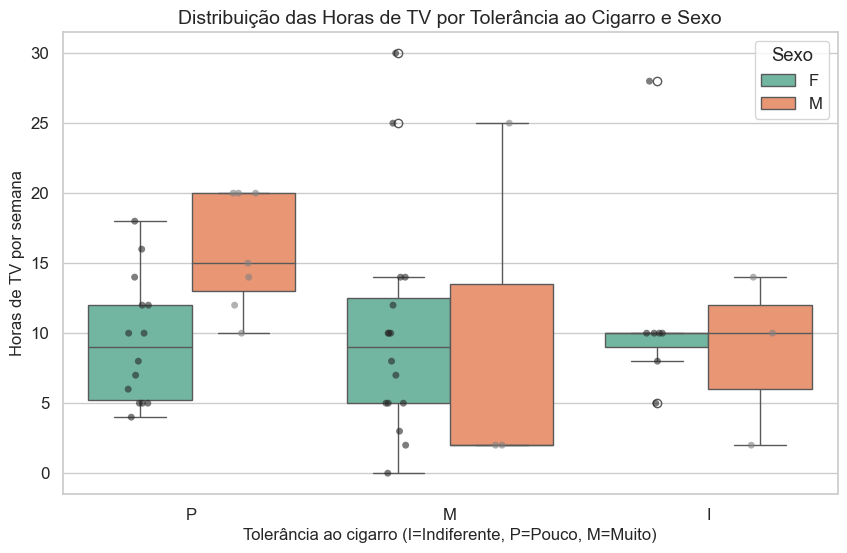

In [14]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

#Boxplot + Stripplot TV x Tolerancia, hue=Sexo

plt.figure(figsize=(10,6))
sns.boxplot(x='tolerancia', y='tv', hue='sexo', data=df, palette="Set2")
sns.stripplot(x='tolerancia', y='tv', hue='sexo', data=df, dodge=True, jitter=True, color='gray', alpha=0.6)

plt.title("Distribuição das Horas de TV por Tolerância ao Cigarro e Sexo", fontsize=14)
plt.xlabel("Tolerância ao cigarro (I=Indiferente, P=Pouco, M=Muito)", fontsize=12)
plt.ylabel("Horas de TV por semana", fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Sexo")
plt.show()


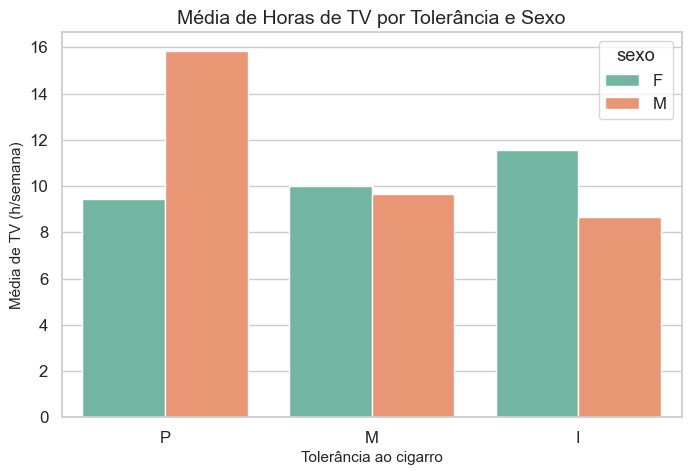

In [15]:
#Barplot da média de TV por Tolerancia e Sexo

plt.figure(figsize=(8,5))
sns.barplot(x='tolerancia', y='tv', hue='sexo', data=df, palette="Set2", ci=None)
plt.title("Média de Horas de TV por Tolerância e Sexo", fontsize=14)
plt.xlabel("Tolerância ao cigarro")
plt.ylabel("Média de TV (h/semana)")
plt.show()

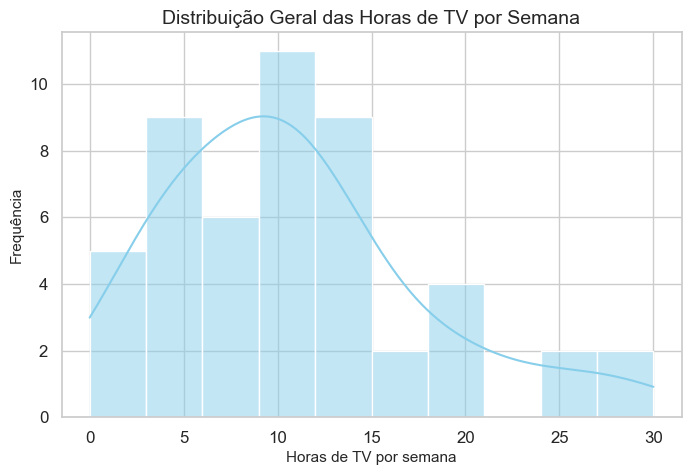

In [16]:
#Histograma + KDE da TV

plt.figure(figsize=(8,5))
sns.histplot(df['tv'], bins=10, kde=True, color='skyblue')
plt.title("Distribuição Geral das Horas de TV por Semana", fontsize=14)
plt.xlabel("Horas de TV por semana")
plt.ylabel("Frequência")
plt.show()

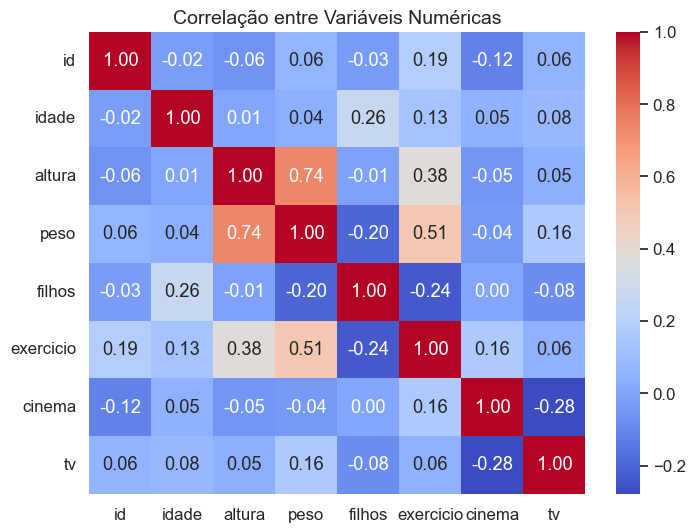

In [17]:
#Heatmap de correlação entre variáveis numéricas
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlação entre Variáveis Numéricas", fontsize=14)
plt.show()